In [2]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import os

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

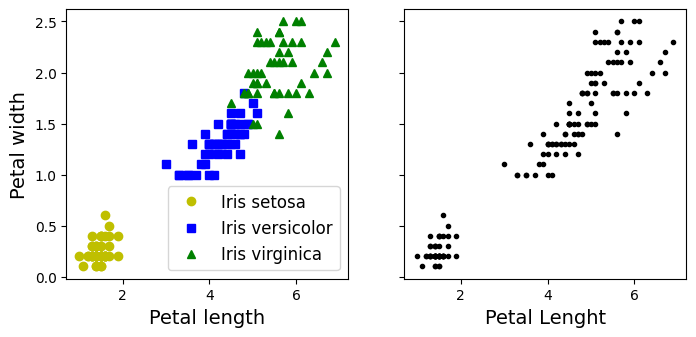

In [4]:
plt.figure(figsize=(8,3.5))
plt.subplot(121)
plt.plot(X[y==0,2],X[y==0,3],"yo",label="Iris setosa")
plt.plot(X[y==1,2], X[y==1,3],"bs", label="Iris versicolor")
plt.plot(X[y==2,2], X[y==2,3],"g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:,2],X[:,3],c="k",marker=".")
plt.xlabel("Petal Lenght", fontsize=14)
plt.tick_params(labelleft=False)
plt.show()

In [5]:
from sklearn.mixture import GaussianMixture

y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

c:\Users\User\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [6]:
from scipy import stats

mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id],keepdims=False,axis=None)
    mapping[mode] = class_id
mapping

{np.int64(1): np.int64(0), np.int64(2): np.int64(1), np.int64(0): np.int64(2)}

In [7]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

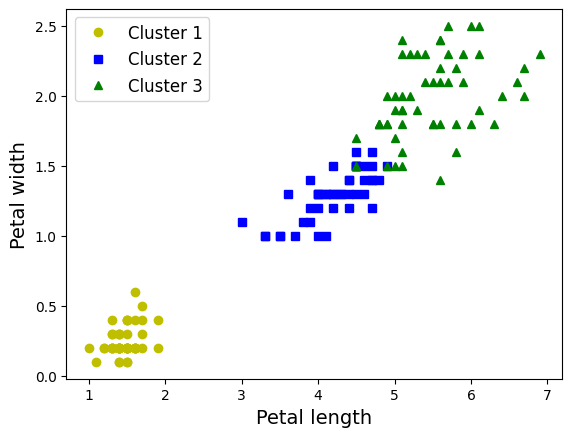

In [8]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [9]:
np.sum(y_pred == y)

np.int64(145)

In [10]:
np.sum(y_pred==y)/len(y_pred)

np.float64(0.9666666666666667)

In [11]:
from sklearn.datasets import make_blobs

In [12]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [13]:
X, y = make_blobs(n_samples=2000,centers=blob_centers,cluster_std=blob_std, random_state=8)

In [14]:
def plot_cluster(X, y=None):
    plt.scatter(X[:,0],X[:, 1],c=y,s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

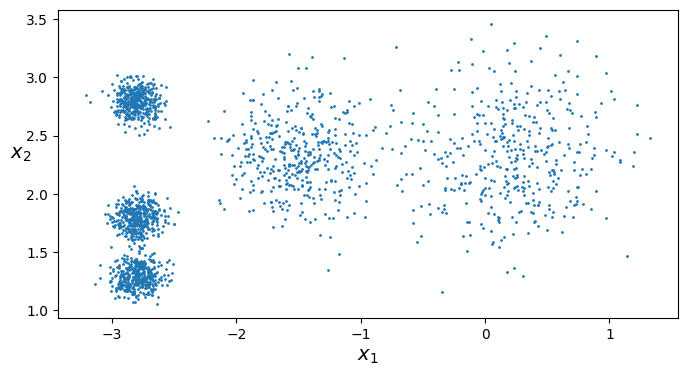

In [15]:
plt.figure(figsize=(8, 4))
plot_cluster(X)
plt.show()

In [16]:
from sklearn.cluster import KMeans

k=5
k_means = KMeans(n_clusters=k,random_state=42)
y_pred = k_means.fit_predict(X)

In [17]:
y_pred

array([3, 1, 4, ..., 4, 2, 3], shape=(2000,), dtype=int32)

In [18]:
y_pred is k_means.labels_

True

In [19]:
k_means.cluster_centers_

array([[ 0.23346055,  2.32440984],
       [-2.79709381,  1.29118469],
       [-2.79864259,  2.78991451],
       [-1.4755909 ,  2.33690655],
       [-2.7880388 ,  1.7973102 ]])

In [20]:
k_means.labels_

array([3, 1, 4, ..., 4, 2, 3], shape=(2000,), dtype=int32)

In [21]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
k_means.predict(X_new)

array([0, 0, 2, 2], dtype=int32)

In [22]:
def plot_data(X):
    plt.plot(X[:,0], X[:,1], 'k.',markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

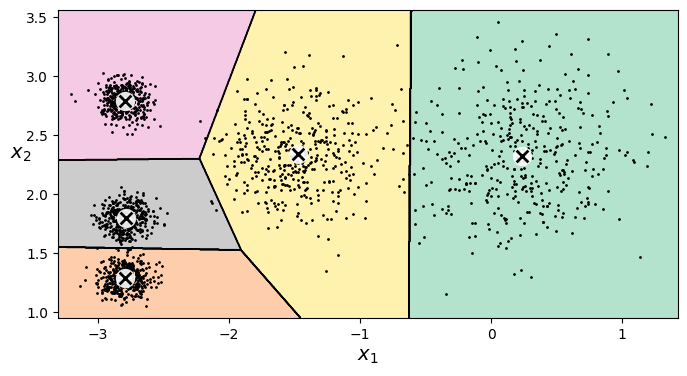

In [23]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(k_means,X)

In [24]:
k_means.transform(X_new)

array([[0.39968184, 2.8855074 , 2.90798303, 1.51356352, 2.79539685],
       [2.78549498, 5.84026676, 5.85219795, 4.48825355, 5.79158669],
       [3.30328461, 1.72081977, 0.29099951, 1.66238263, 1.22122492],
       [3.23822467, 1.22572647, 0.3529805 , 1.53310879, 0.73396219]])

In [25]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - k_means.cluster_centers_, axis=2)

array([[0.39968184, 2.8855074 , 2.90798303, 1.51356352, 2.79539685],
       [2.78549498, 5.84026676, 5.85219795, 4.48825355, 5.79158669],
       [3.30328461, 1.72081977, 0.29099951, 1.66238263, 1.22122492],
       [3.23822467, 1.22572647, 0.3529805 , 1.53310879, 0.73396219]])

In [26]:
kmeans_iter1 = KMeans(n_clusters=5, init="random",n_init=1,
                      algorithm="lloyd",max_iter=1,random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random",n_init=1,
                      algorithm="lloyd",max_iter=2,random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random",n_init=1,
                      algorithm="lloyd",max_iter=3,random_state=1)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(init='random', max_iter=3, n_clusters=5, n_init=1, random_state=1)

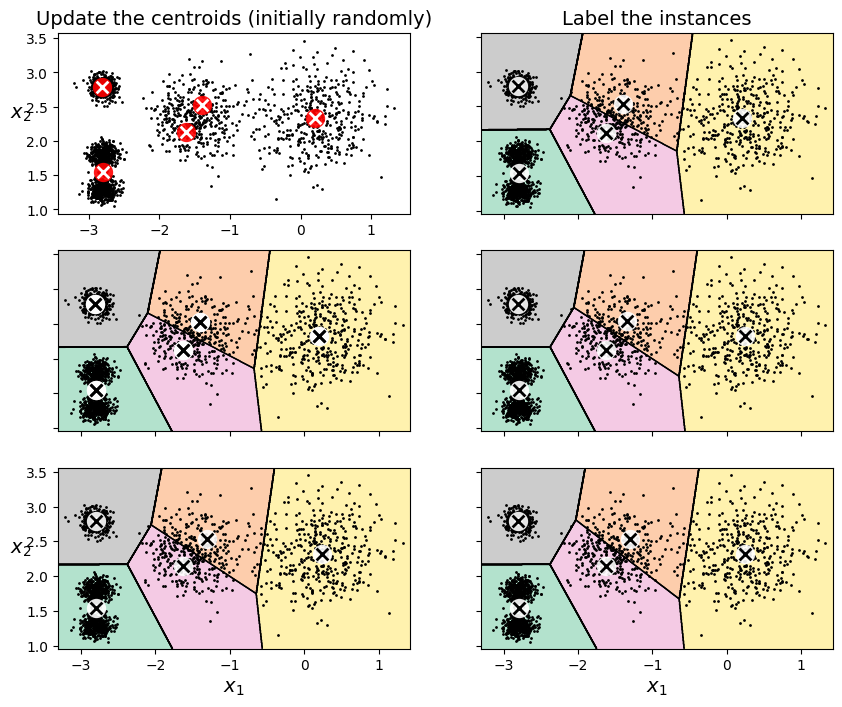

In [27]:
plt.figure(figsize=(10,8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_,circle_color='r',cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.title("Update the centroids (initially randomly)",fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1,X,show_xlabels=False,show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1,X,show_xlabels=False,show_ylabels=False)
plot_centroids(kmeans_iter1.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

In [28]:
def plot_clusterer_comprasion(clusterer1,clusterer2,X,title1=None,title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))
    plt.subplot(121)
    plot_decision_boundaries(clusterer1,X)
    if title1:
        plt.title(title1,fontsize=14)
    
    plt.subplot(122)
    plot_decision_boundaries(clusterer2,X)
    if title2:
        plt.title(title2,fontsize=14)

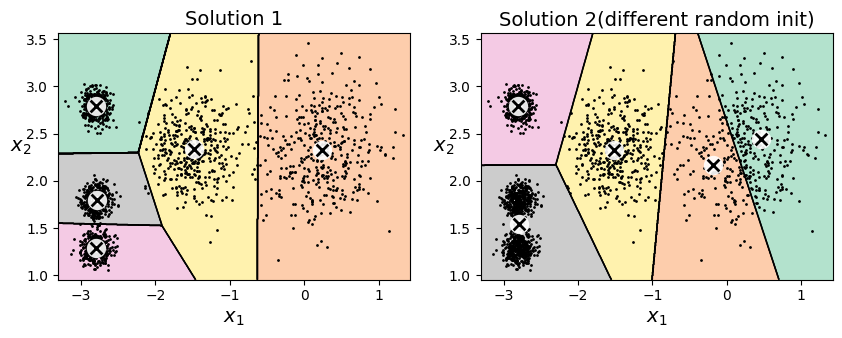

In [29]:
kmeans_rnd_init1 = KMeans(n_clusters=5,init="random",n_init=1,
                          algorithm="lloyd",random_state=8)

kmeans_rnd_init2 = KMeans(n_clusters=5,init="random",n_init=1,
                          algorithm="lloyd",random_state=9)

plot_clusterer_comprasion(kmeans_rnd_init1,kmeans_rnd_init2,X,"Solution 1","Solution 2(different random init)")
plt.show()

In [30]:
k_means.inertia_

222.67034531177472

In [31]:
X_dist = k_means.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), k_means.labels_]**2)

np.float64(222.6703453117749)

In [32]:
k_means.score(X)

-222.67034531177472

In [33]:
kmeans_rnd_init1.inertia_

222.67034531177467

In [34]:
kmeans_rnd_init2.inertia_

230.9900051958303

In [35]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="lloyd", random_state=2)
kmeans_rnd_10_inits.fit(X)

KMeans(init='random', n_clusters=5, n_init=10, random_state=2)

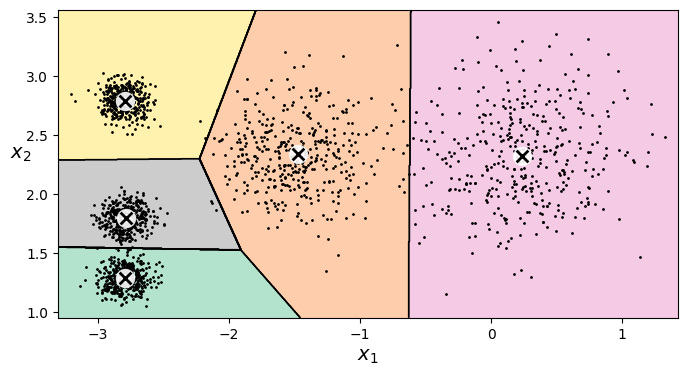

In [36]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits,X)

### Centroid initialization methods


In [37]:
KMeans()

KMeans()

In [38]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
k_means = KMeans(n_clusters=5,init=good_init,n_init=1,random_state=42)
k_means.fit(X)
k_means.inertia_

222.6703453117747

### Mini-Batch K-Means


In [39]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5,random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [40]:
minibatch_kmeans.inertia_

241.40470037823835

In [41]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False,version=1)
mnist.target = mnist.target.astype(np.int64)

In [42]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(mnist['data'], mnist['target'],test_size=0.2,random_state=42)

In [43]:
filename = 'my_mnist.data'
X_mm = np.memmap(filename, dtype='float32',mode='write',shape=X_train.shape)
X_mm[:] = X_train

In [44]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)

c:\Users\User\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(batch_size=10, n_clusters=10, random_state=42)

In [45]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X),batch_size,replace=False)]

In [46]:
np.random.seed(42)

k=5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k,init_size=init_size)
    X_init =  load_next_batch(batch_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iterations in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iterations > n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_
    
    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

c:\Users\User\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
c:\Users\User\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
c:\Users\User\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THRE

In [47]:
best_kmeans.score(X)

-222.7159284509372

In [48]:
from timeit import timeit

times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

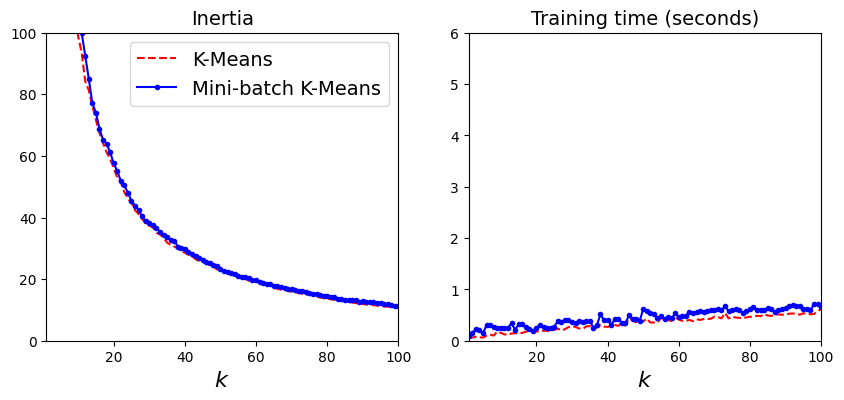

In [49]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])

plt.show()

### Finding the optimal number of clusters


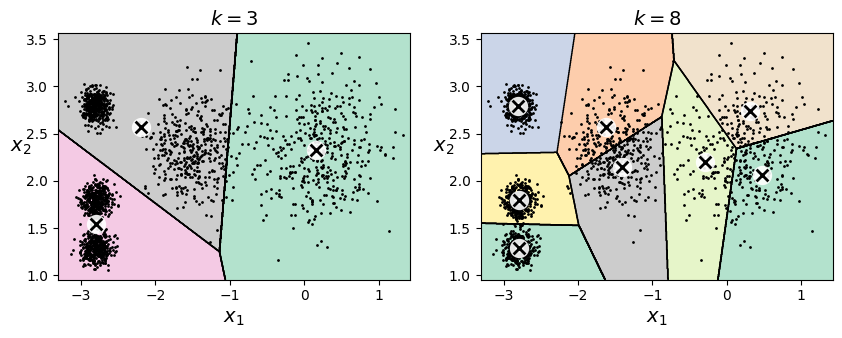

In [50]:
k_means3 = KMeans(n_clusters=3,random_state=42)
k_means8 = KMeans(n_clusters=8,random_state=42)

plot_clusterer_comprasion(k_means3,k_means8,X,"$k=3$","$k=8$")
plt.show()

In [51]:
k_means3.inertia_

646.0069824734203

In [52]:
k_means8.inertia_

128.04474893537048

In [53]:
kmeans_per_k= [KMeans(n_clusters=k,random_state=42).fit(X)
                      for k in range(1,10)]
inertias_ = [model.inertia_ for model in kmeans_per_k]

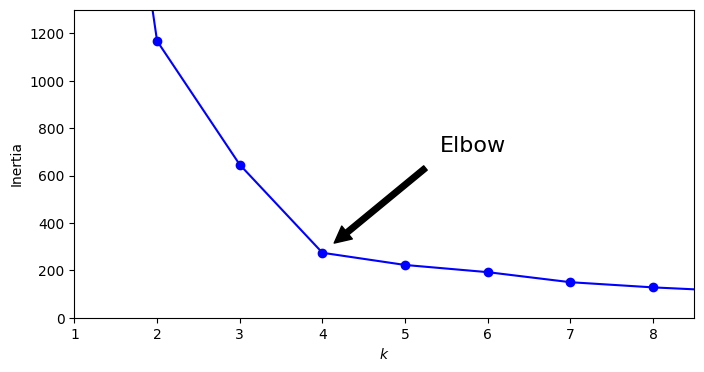

In [54]:
plt.figure(figsize=(8,4))
plt.plot(range(1,10),inertias_,"bo-")
plt.xlabel('$k$')
plt.ylabel("Inertia")
plt.annotate('Elbow',
             xy=(4,inertias_[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black',shrink=0.1))
plt.axis([1, 8.5, 0, 1300])
plt.show()

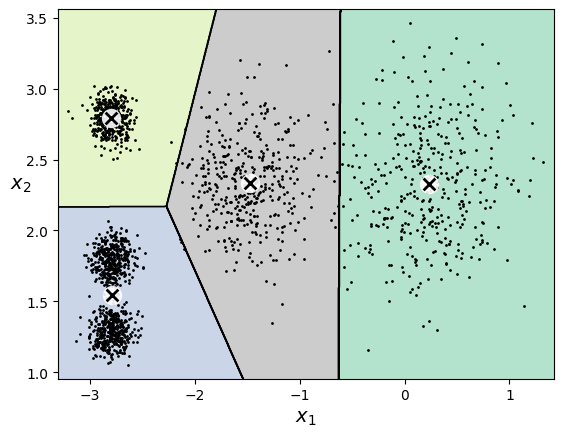

In [55]:
plot_decision_boundaries(kmeans_per_k[4-1],X)
plt.show()

In [56]:
from sklearn.metrics import silhouette_score
silhouette_score(X, k_means.labels_)

np.float64(0.6520055575674671)

In [57]:
silhouette_scores = [silhouette_score(X, model.labels_)
                    for model in kmeans_per_k[1:]]

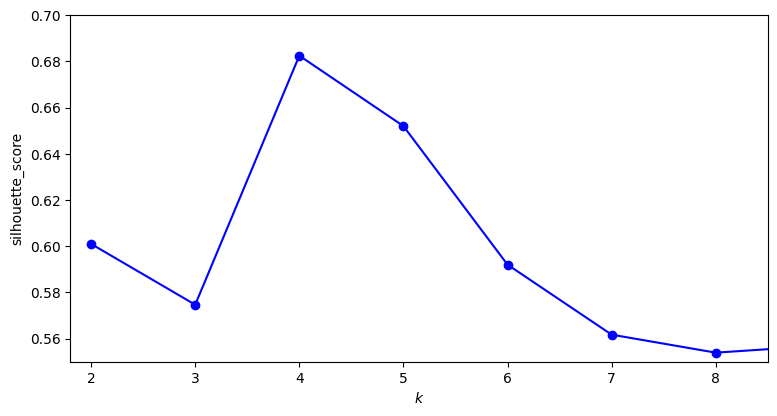

In [58]:
plt.figure(figsize=(9,4.5))
plt.plot(range(2,10),silhouette_scores,"bo-")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.ylabel("silhouette_score")
plt.xlabel("$k$",rotation=0)
plt.show()

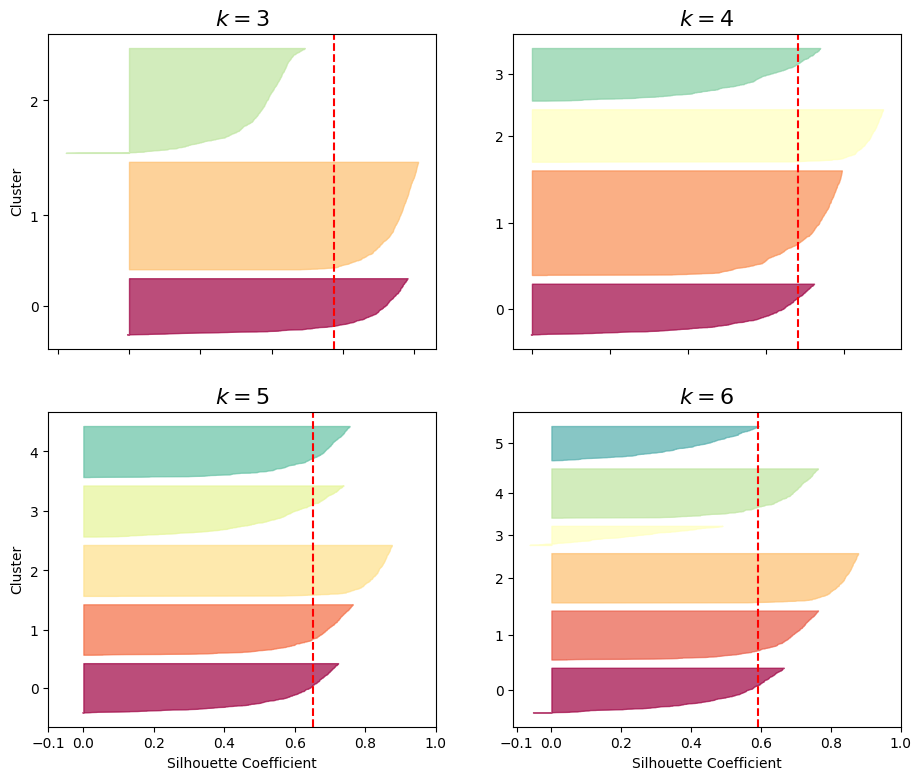

In [59]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

### Limits of K-Means


In [60]:
X1, y1 = make_blobs(n_samples=1000,centers=((4,-4), (0,0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6,-8]
X = np.r_[X1,X2]
y = np.r_[y1,y2]

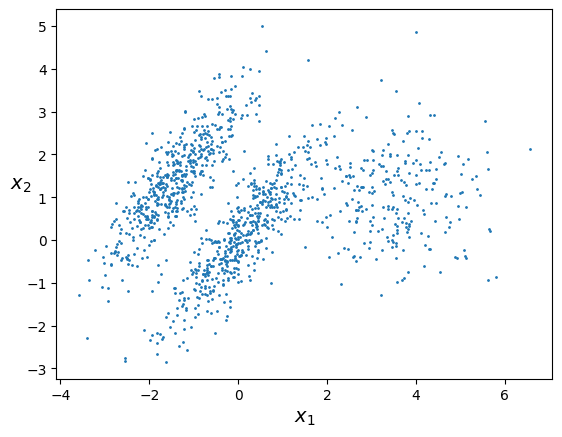

In [61]:
plot_cluster(X)

In [62]:
kmeans_good = KMeans(n_clusters=3,n_init=1, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]),random_state=42)
kmeans_bad = KMeans(n_clusters=3,random_state=2)
kmeans_bad.fit(X)
kmeans_good.fit(X)

KMeans(init=array([[-1.5,  2.5],
       [ 0.5,  0. ],
       [ 4. ,  0. ]]),
       n_clusters=3, n_init=1, random_state=42)

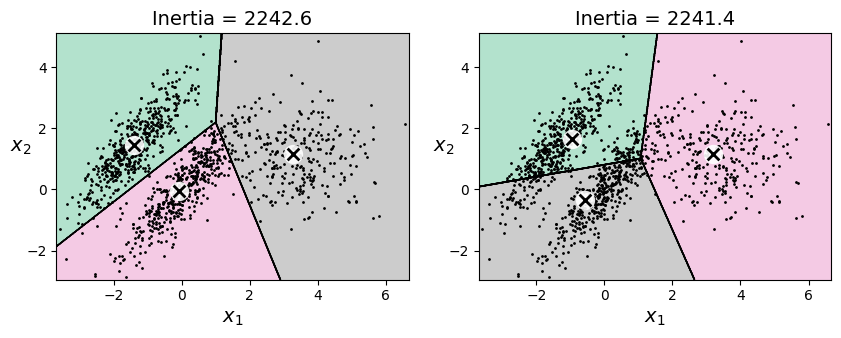

In [63]:
plt.figure(figsize=(10,3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good,X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad,X)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_),fontsize=14)
plt.show()

In [102]:
# Download the  image
import os
import urllib
from matplotlib.image import imread

image_path = r'C:\Users\User\OneDrive\Desktop\all_in_one\unsupervised_learning\images\unsupervised_learning\horse.jpg'
image = imread(image_path)
image.shape

(360, 540, 3)

In [103]:
X = image.reshape(-1,3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [104]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_cluster in n_colors:
    kmeans = KMeans(n_clusters=n_cluster,random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

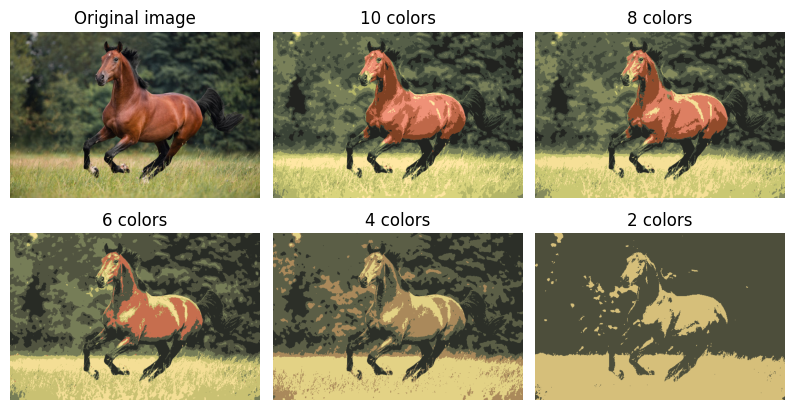

In [105]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis(False)

segmented_imgs = np.array(segmented_imgs)

if segmented_imgs.dtype == 'float':
    segmented_imgs = segmented_imgs / segmented_imgs.max() 
elif segmented_imgs.dtype == 'int' or segmented_imgs.dtype == 'uint8':
    segmented_imgs = np.clip(segmented_imgs, 0, 255)

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title(f'{n_clusters} colors')
    plt.axis(False)

plt.show()

### Using Clustering for Preprocessing


In [106]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_digits,y_digits = load_digits(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X_digits,y_digits,random_state=42)

log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000,random_state=42)
log_reg.fit(X_train,y_train)

c:\Users\User\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [107]:
log_reg_score = log_reg.score(X_test,y_test)
log_reg_score

0.9688888888888889

In [108]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("k_means",KMeans(n_clusters=50,random_state=42)),
    ("log_reg",LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42))
])

pipeline.fit(X_train,y_train)

c:\Users\User\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('k_means', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [109]:
pipeline_score = pipeline.score(X_test,y_test)
pipeline_score

0.98

### Using Clustering for Semi-Supervised Learning


In [112]:
n_labeled = 50
log_reg = LogisticRegression(solver='lbfgs',multi_class="ovr",random_state=42)
log_reg.fit(X_train[:n_labeled],y_train[:n_labeled])
log_reg.score(X_test,y_test)

c:\Users\User\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.8333333333333334

In [116]:
k = 50
kmeans = KMeans(n_clusters=k,random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist,axis=0)
X_representative_digits = X_train[representative_digit_idx]

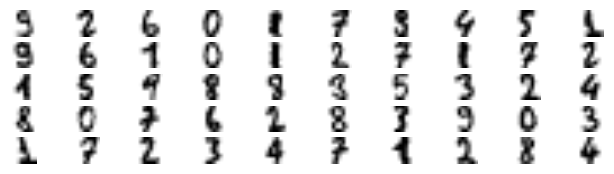

In [119]:
plt.figure(figsize=(8,2))

for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8,8), cmap='binary', interpolation="bilinear")
    plt.axis("off")
plt.show()

In [122]:
y_train[representative_digit_idx]

array([9, 2, 6, 0, 1, 7, 9, 4, 5, 1, 9, 6, 1, 0, 1, 2, 7, 1, 7, 2, 1, 5,
       9, 8, 8, 3, 5, 3, 2, 4, 8, 0, 7, 6, 2, 8, 3, 9, 0, 3, 1, 7, 2, 3,
       4, 7, 1, 2, 8, 4])

In [123]:
y_representative_digits = np.array([9, 2, 6, 0, 1, 7, 9, 4, 5, 1, 9, 6, 1, 0, 1, 2, 7, 1, 7, 2, 1, 5,
                                    9, 8, 8, 3, 5, 3, 2, 4, 8, 0, 7, 6, 2, 8, 3, 9, 0, 3, 1, 7, 2, 3,
                                    4, 7, 1, 2, 8, 4])

In [125]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits,y_representative_digits)
log_reg.score(X_test,y_test)

c:\Users\User\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.9133333333333333

In [127]:
type(X_representative_digits)

numpy.ndarray

In [128]:
y_train_propagated = np.empty(len(X_train),dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [129]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

c:\Users\User\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [130]:
log_reg.score(X_test, y_test)

0.9288888888888889

In [131]:
percentile_closest = 75

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [132]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [133]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

c:\Users\User\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [134]:
log_reg.score(X_test, y_test)

0.9377777777777778

In [135]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

np.float64(0.9672293942403177)